In [12]:
# 사이킷런 라이브러리 다운로드
!pip install scikit-learn==1.5.1

# 라이브러리 설치 확인
import sklearn
print(sklearn.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 103.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
1.6.1


# 다중회귀분석

In [13]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
study = pd.read_csv(io.BytesIO(myfile['공부시간과시험점수2.csv']),
                       encoding='cp949')
study

Saving 공부시간과시험점수2.csv to 공부시간과시험점수2 (1).csv


KeyError: '공부시간과시험점수2.csv'

In [109]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# data, target 지정
# 다중회귀분석의 경우 data를 여러개 설정.
data = study[['공부시간','학원수','과외여부']]
target = study['시험점수']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [110]:
from sklearn.linear_model import LinearRegression
# 선형회귀분석 학습
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# 13, 5, 0이라는 값을 넣어 예측
lr.predict([[13,5,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([85.34138636])

In [111]:
# 테스트 데이터로 스코어 확인
lr.score(X_test , y_test)

0.7798044117078256

# 다항회귀분석

In [112]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
fish = pd.read_csv(io.BytesIO(myfile['fish_perch3.csv']) )
fish

KeyboardInterrupt: 

In [135]:
#Step 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

# data, target 정의
data = fish[['Length']]
target = fish['Weight']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

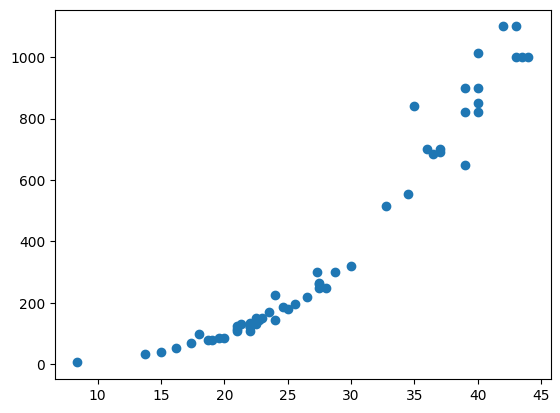

In [136]:
# Step 3. 단순회귀인지 다항회귀인지 그래프로 산포도 확인
import matplotlib.pyplot as plt
plt.plot(data,target,'o')
plt.show()

In [137]:
X_train.shape

(44, 1)

In [61]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

In [62]:
# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)

In [138]:
#Step 4. 데이터 값을 제곱한 컬럼을 추가합니다
import numpy as np
X_train_data_new = X_train.copy()
X_train_data_new['Length ** 2'] = X_train_data_new['Length'] ** 2
X_test_data_new = X_test.copy()
X_test_data_new['Length ** 2'] = X_test_data_new['Length'] ** 2
print(X_train_data_new.shape , X_test_data_new.shape)

(44, 2) (12, 2)


In [139]:
#Step 5. 분석하고 예측합니다
# 선형회귀 모델 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_data_new,y_train)

y_pred = lr.predict(X_test_data_new)

# 예측
print(lr.predict([[50**2,50]]))

[-60407.46467169]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


In [140]:
#계수와 절편 값 확인하기
print(lr.coef_ , lr.intercept_)

[-24.24295816   1.07107355] 146.37705197638616


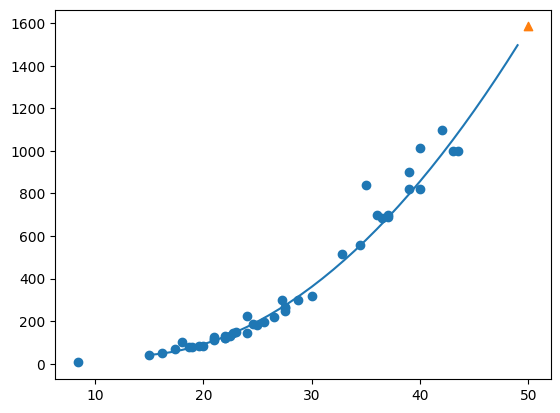

In [141]:
#그래프로 시각화합니다
p = np.arange(15,50)

#훈련 데이터의 분포를 그립니다.
import matplotlib.pyplot as plt
plt.scatter(X_train , y_train)
plt.plot(p , 1.13 * p ** 2 - 29.5 * p + 229.3)

#찾는 데이터
plt.scatter([50] , [1584.9] , marker='^')
plt.show()

In [134]:
# 모델의 성능 평가
print(lr.score(X_train_data_new , y_train))
print(lr.score(X_test_data_new , y_test))

0.9520391391229546
0.9588711863159853


# 맨하탄 주택가격

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
house = pd.read_csv('맨하탄주택가격.csv',encoding='cp949')
house

In [86]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
house = pd.read_csv(io.BytesIO(myfile['맨하탄주택가격.csv']),encoding='cp949')
house

Saving 맨하탄주택가격.csv to 맨하탄주택가격.csv


,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [95]:
house.isnull().count()

,0
rental_id,3539
rent,3539
bedrooms,3539
bathrooms,3539
size_sqft,3539
min_to_subway,3539
floor,3539
building_age_yrs,3539
no_fee,3539
has_roofdeck,3539


In [91]:
#Step 2. 훈련용데이터셋과 테스트용 데이터셋으로 분리
# 다중회귀분석의 경우, feature(column)를 여러 개 사용하는 방법입니다.
from sklearn.model_selection import train_test_split

# data 변수에 사용할 feature들을 적어주세요.
# 전체 feature 종류 : [['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
data = house[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

# 훈련에 사용될 target 정의
target = house['rent']

# train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


In [92]:
#Step 3. 분석하고 예측합니다
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 내가 찾는 집의 조건 변수입니다. predict함수의 인수로 넣어주세요.
condition = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

# condition 변수를 통한 예측
model.predict(condition)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([2383.70316282])

In [93]:
model.score(X_test , y_test)

0.8022828167551243

In [99]:
data1 = data.copy()

In [100]:
data1['size_sqft * has_gym'] = data1['size_sqft'] * data1['has_gym']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data1, target, test_size=0.2)

In [105]:
#Step 3. 분석하고 예측합니다
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [106]:
model.score(X_test , y_test)

0.7731081379240117